In [1]:
# 5.3.1
# The validation set approch
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import datasets 

In [2]:
# https://realpython.com/python-csv/
# Read CSV file python
import pandas
df = pandas.read_csv('Dataset/Auto.csv', na_values = '?').dropna()
#print(df)

In [3]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
df.shape

(392, 9)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.horsepower, df.mpg, test_size = 0.5, random_state = 42)
X_train = np.asarray(X_train).reshape(-1,1)
X_test = np.asarray(X_test).reshape(-1,1)
y_train = np.asarray(y_train).reshape(-1,1)
y_test = np.asarray(y_test).reshape(-1,1)

In [6]:
#print(X_test.head())
# Vi ser her rækken hvorfra data er fra og værdien.

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


Text(0.5, 1.0, '')

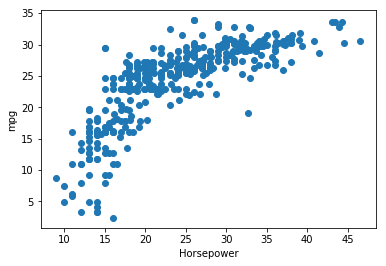

In [9]:
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(np.asarray(df.horsepower).reshape(-1,1))
X_re = np.asarray(df.mpg).reshape(-1,1)
plt.scatter(X_re, y_pred)
plt.xlabel("Horsepower")
plt.ylabel("mpg")
plt.title("")

In [10]:
from sklearn.metrics import mean_squared_error


In [11]:
# Mean squared error
mse = mean_squared_error(X_re, y_pred)
print(mse)

24.36780369448904


In [12]:
#-----------------------------------

# 2. orden

#----------------------------------

lm2 = smf.ols ('mpg~horsepower + I(horsepower ** 2.0)', data = df).fit()
preds = lm2.predict(df)
square_error = (df['mpg'] - preds)**2
print('--------Test Error for 2nd order--------')
print(square_error.mean())

--------Test Error for 2nd order--------
18.98476890761722


In [13]:
#-----------------------------------

# 3. orden

#----------------------------------

lm3 = smf.ols('mpg~horsepower + I(horsepower ** 2.0) + I(horsepower ** 3.0)', data = df).fit()
preds = lm3.predict(df)
square_error_3 = (df['mpg'] - preds)**2
print('--------Test Error for 3rd order--------')
print(square_error_3.mean())

--------Test Error for 3rd order--------
18.944989814485915
